In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import math
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression

In [29]:
with open('data/R2_STD_IVS_DFW_SORTED.pkl', 'rb') as file:
    standard_ivs_params = pickle.load(file)

In [30]:
l = [1, 2, 3, 4]
l[:3]

[1, 2, 3]

In [14]:
count = 1
for date in standard_ivs_params:
    if count == 2386:
        print(date)
    if count == 1:
        print(date)
    count+=1

2010-02-08
2019-10-15


MOST RECENT

In [39]:
dates = sorted(list(standard_ivs_params.keys()), key=lambda date: datetime.strptime(date, '%Y-%m-%d'))

start_idx = 2898
end_idx = len(dates)

dates[start_idx:end_idx][-1], dates[start_idx:end_idx][0], len(dates[start_idx:end_idx])

('2023-09-29', '2021-09-14', 511)

In [27]:
dates = sorted(list(standard_ivs_params.keys()), key=lambda date: datetime.strptime(date, '%Y-%m-%d'))
dates[-1]

'2023-09-29'

In [10]:
count * 0.7

2386.2999999999997

## SNS HeatMap

<Axes: >

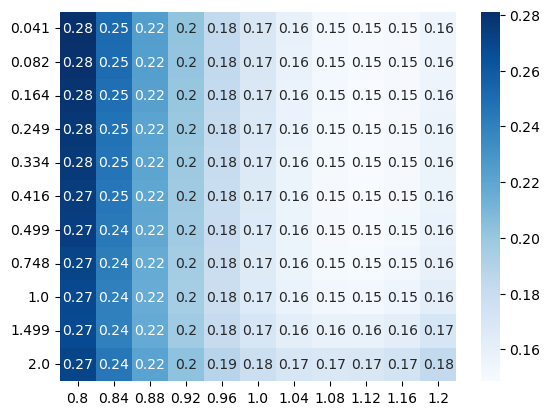

In [13]:
test = standard_ivs_params['2011-05-26'][0].copy()
test.index = test.index.round(3)
'''
test['τ\m'] = test.index
cols = test.columns.tolist()
cols = cols[-1:] + cols[:-1]
test = test[cols]
'''
sns.heatmap(test, annot=True, fmt='.2g', cmap='Blues')

## Table Render

In [21]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.round(5).values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

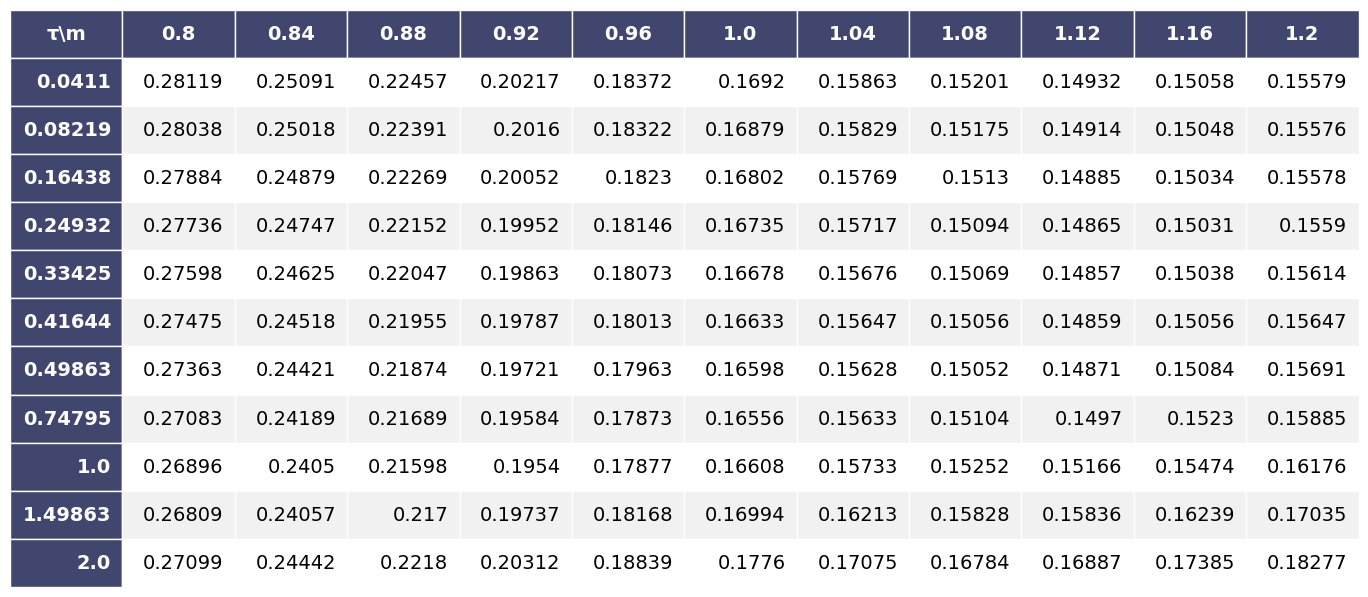

In [33]:
fig,ax = render_mpl_table(test, header_columns=1, col_width=1.45)


## 3D Plot

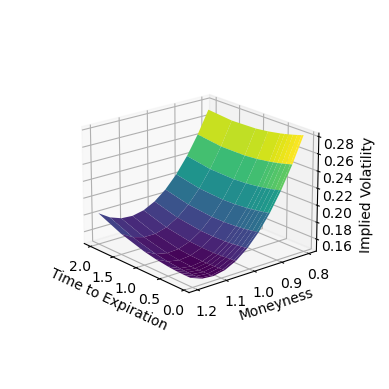

In [56]:
fig = plt.figure(40)
ax = fig.add_subplot(111, projection='3d')

date_using = standard_ivs_params['2011-05-26'][0]
x, y = np.meshgrid(date_using.columns, date_using.index)
z = date_using.values

my_cmap = plt.get_cmap('viridis')
ax.plot_surface(y, x, z, cmap=my_cmap)
ax.view_init(20, 140) 
ax.set_xlabel('Time to Expiration', labelpad=7)
ax.set_ylabel('Moneyness', labelpad=6)
ax.set_zlabel('Implied Volatility', labelpad=8)
ax.set_box_aspect(aspect=None, zoom=0.7)
plt.show()

## Average Daily IV Plot

In [34]:
total_IV_by_date = []
for date in standard_ivs:
    total_IV_by_date.append(standard_ivs[date].mean().mean())
df = pd.DataFrame(total_IV_by_date)
df.index = pd.to_datetime(list(standard_ivs.keys()))
df.columns = ['Average Daily IV']

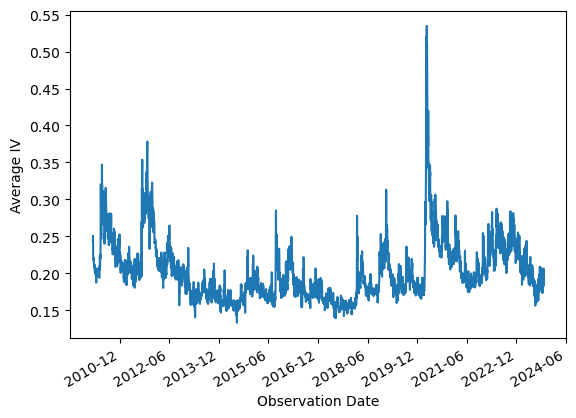

In [68]:
ax = df['Average Daily IV'].plot()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=18))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
ax.set_xlabel('Observation Date')
ax.set_ylabel('Average IV')
plt.show()